In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  7 12:40:51 2019

@author: eliassmouni
"""

'\nCreated on Mon Oct  7 12:40:51 2019\n\n@author: eliassmouni\n'

In [2]:
# =============================================================================
# WiFi task
# =============================================================================
# =============================================================================
# Load packages
# =============================================================================

In [3]:
import os

print("Current Working Directory " , os.getcwd())

#### Ignacio: Those liens are system dependent and therefore they shouldn't be used
#try:
# Change the current working Directory    
#  os.chdir(os.path.expanduser("~/Documents/Ubiqum/wifi task"))
#  print("Directory changed")
#except OSError:
#  print("Can't change the Current Working Directory")        

Current Working Directory  C:\Users\Ignacio\Documents\UBIQUM\MENTOR\DA118\Elias_Smouni\Wifi-fingerprinting


In [4]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint
import scipy
from math import sqrt
from numpy import array

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px
from plotly.offline import plot

# other
from sklearn.externals import joblib
import statsmodels.stats.api as sms
from sklearn.utils import resample

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#Scoring Metrics
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import classification_report

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [5]:
# =============================================================================
# DATASETS
# =============================================================================

In [62]:
# import datasets
#### Ignacio: A nice trick using module "glob" 
import glob

#### Glob function allows you to find files matching a pattern.
datafiles = glob.glob("*Data.csv")

#### Now, as we don't know breforehand in which order they will appear the datafiles, we will use a list comprehension
#### to find out in which location of the list is stored the traindata.csv. And the same can be repeated for the other
#### files.
tri = [i for i, elem in enumerate(datafiles) if 'train' in elem]

#path = "file:///Users/eliassmouni/Documents/Ubiqum/wifi%20task/Data/trainingData.csv"
trainingData = pd.read_csv(datafiles[tri[0]])
print("Training data sample: ")
display(trainingData.head())
print()

vai = [i for i, elem in enumerate(datafiles) if 'valid' in elem]
#pathval = "file:///Users/eliassmouni/Documents/Ubiqum/wifi%20task/Data/validationData.csv"
validationData = pd.read_csv(datafiles[vai[0]])
print("Validation data sample: ")
display(validationData.head())
print()

tei = [i for i, elem in enumerate(datafiles) if 'test' in elem]
#pathtest = "file:///Users/eliassmouni/Documents/Ubiqum/wifi%20task/Data/testData.csv"
print("Test data sample: ")
testData = pd.read_csv(datafiles[tei[0]])
display(testData.head())
print()

del tri, vai, tei

Training data sample: 


WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   
4     100  ...     100 -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 2       2       23  1371713733  
1                 2       2       23  1371713691  
2                 2       2       23  1371714095  
3                 2       2       23  1371713807  
4                 2      11       13  1369909710  

[5 rows x 529 columns]


Validation data sample: 


WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520    LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7515.916799  4.864890e+06      1           1        0   
1     100  ...     100 -7383.867221  4.864840e+06      4           2        0   
2     100  ...     100 -7374.302080  4.864847e+06      4           2        0   
3     100  ...     100 -7365.824883  4.864843e+06      4           2        0   
4     100  ...     100 -7641.499303  4.864922e+06      2           0        0   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 0       0        0  1380872703  
1                 0       0       13  1381155054  
2                 0       0       13  1381155095  
3                 0       0       13  1381155138  
4                 0       0        2  1380877774  

[5 rows x 529 columns]


Test data sample: 


WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE  LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100          0         0      0           0        0   
1     100  ...     100          0         0      0           0        0   
2     100  ...     100          0         0      0           0        0   
3     100  ...     100          0         0      0           0        0   
4     100  ...     100          0         0      0           0        0   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 0       0       15  1385716325  
1                 0       0       15  1385716326  
2                 0       0       15  1385716326  
3                 0       0       15  1385716327  
4                 0       0       15  1385716327  

[5 rows x 529 columns]

In [63]:
# =============================================================================
# DATA EXPLORATION
# =============================================================================

In [64]:
# Work on trainingData first
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = trainingData.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 529
Number of rows: 19937


In [65]:
#check the statistics of the data per columns
decription = trainingData.describe()
trainingData.info

<bound method DataFrame.info of        WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
5         100     100     100     100     100     100     100     100     100   
6         100     100     100     100     100     100     100     100     100   
7         100     100     100     100     100     100     100     100     100   
8         100     100     100     100     100     100     100     100     100   
9         100     100     100     100     100     100     100     100     100   
10        100     100     100     100     100     100     100     -83     100

In [66]:
#Check the columns names
col_names = trainingData.columns.values
col_names

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

In [68]:
#### Ignacio: You gave for granted that all the variables types are the correct ones. However, this is not true.
#### As in R, you need to fix the types.

trainingData[['BUILDINGID','FLOOR','USERID','SPACEID','RELATIVEPOSITION','PHONEID']] = trainingData[['BUILDINGID','FLOOR','USERID','SPACEID','RELATIVEPOSITION','PHONEID']].apply(lambda x: x.astype('category'))
trainingData.dtypes
#trainingData.columns

WAP001                 int64
WAP002                 int64
WAP003                 int64
WAP004                 int64
WAP005                 int64
WAP006                 int64
WAP007                 int64
WAP008                 int64
WAP009                 int64
WAP010                 int64
WAP011                 int64
WAP012                 int64
WAP013                 int64
WAP014                 int64
WAP015                 int64
WAP016                 int64
WAP017                 int64
WAP018                 int64
WAP019                 int64
WAP020                 int64
WAP021                 int64
WAP022                 int64
WAP023                 int64
WAP024                 int64
WAP025                 int64
WAP026                 int64
WAP027                 int64
WAP028                 int64
WAP029                 int64
WAP030                 int64
                      ...   
WAP500                 int64
WAP501                 int64
WAP502                 int64
WAP503        

In [69]:
#check for missing values
missing_values_count = trainingData.isnull().sum()
missing_values_count_test = testData.isnull().sum()
print("The training data has missing values: " % (missing_values_count))
print("The test data has missing values: " % (missing_values_count_test))

The training data has missing values: 
The test data has missing values: 


In [70]:
# how many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()
print("The dataset has the following missing values: " % (total_missing)) #0
missing_values_count.sum()

The dataset has the following missing values: 


0

In [71]:
# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100
print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [72]:
# accesss unique values per feature
## trainingData
unique_floors = trainingData["FLOOR"].unique()
unique_bldgs = trainingData["BUILDINGID"].unique()
unique_spaceid = trainingData["SPACEID"].unique()
unique_rpos = trainingData["RELATIVEPOSITION"].unique()
unique_users = trainingData["USERID"].unique()
unique_phones = trainingData["PHONEID"].unique()

print("Unique Floors : {}".format(unique_floors))
print("Unique Buildings : {}".format(unique_bldgs))
print("Unique Relative Positions : {}".format(unique_rpos))
print("Unique Users : {}".format(unique_users))
print("Unique Space IDs : {}".format(unique_spaceid))
print("Unique Phones : {}".format(unique_phones))

unique_floors_count = len(unique_floors)
unique_bldgs_count = len(unique_bldgs)
unique_spaceid_count = len(unique_spaceid)
unique_rpos_count = len(unique_rpos)
unique_users_count = len(unique_users)
unique_phones_count = len(unique_phones)

Unique Floors : [2, 0, 3, 4, 1]
Categories (5, int64): [2, 0, 3, 4, 1]
Unique Buildings : [1, 0, 2]
Categories (3, int64): [1, 0, 2]
Unique Relative Positions : [2, 1]
Categories (2, int64): [2, 1]
Unique Users : [2, 11, 3, 4, 5, ..., 14, 15, 1, 17, 18]
Length: 18
Categories (18, int64): [2, 11, 3, 4, ..., 15, 1, 17, 18]
Unique Space IDs : [106, 103, 102, 122, 105, ..., 25, 13, 12, 11, 14]
Length: 123
Categories (123, int64): [106, 103, 102, 122, ..., 13, 12, 11, 14]
Unique Phones : [23, 13, 16, 18, 3, ..., 17, 7, 11, 22, 10]
Length: 16
Categories (16, int64): [23, 13, 16, 18, ..., 7, 11, 22, 10]


In [73]:
## repeat on validationData

#print the number of rows and columns
num_rows_Val, num_cols_Val  = validationData.shape
print('VAL: Number of columns: {}'.format(num_cols_Val))
print('VAL: Number of rows: {}'.format(num_rows_Val))

#check the statistics of the data per columns
decription_Val = validationData.describe()
validationData.info

#Check the columns names
col_names_Val = validationData.columns.values

#check for missing values
missing_values_count_Val = validationData.isnull().sum()

#see the count of missing data per column:
missing_values_count_Val

# how many total missing values do we have?
total_cells_Val = np.product(validationData.shape)
total_missing_Val = missing_values_count_Val.sum()
total_missing_Val #0

# access unique values per feature
unique_floors_val = validationData["FLOOR"].unique()
unique_bldgs_val = validationData["BUILDINGID"].unique()
unique_spaceid_val = validationData["SPACEID"].unique()
unique_rpos_val = validationData["RELATIVEPOSITION"].unique()
unique_users_val = validationData["USERID"].unique()
unique_phones_val = validationData["PHONEID"].unique()

print("Unique Floors VAL : {}".format(unique_floors_val))
print("Unique Buildings VAL : {}".format(unique_bldgs_val))
print("Unique Relative Positions VAL : {}".format(unique_rpos_val))
print("Unique Users VAL : {}".format(unique_users_val))
print("Unique Space IDs VAL : {}".format(unique_spaceid_val))
print("Unique Phones VAL : {}".format(unique_phones_val))

unique_floors_val_count = len(unique_floors_val)
unique_bldgs_val_count = len(unique_bldgs_val)
unique_spaceid_val_count = len(unique_spaceid_val)
unique_rpos_val_count = len(unique_rpos_val)
unique_users_val_count = len(unique_users_val)
unique_phones_val_count = len(unique_phones_val)

VAL: Number of columns: 529
VAL: Number of rows: 1111
Unique Floors VAL : [1 4 2 3 0]
Unique Buildings VAL : [1 2 0]
Unique Relative Positions VAL : [0]
Unique Users VAL : [0]
Unique Space IDs VAL : [0]
Unique Phones VAL : [ 0 13  2 12 20 21  4  9 15  5 14]


In [74]:
### repeat on testdata

#print the number of rows and columns
num_rows_Test, num_cols_Test  = testData.shape
print('TEST: Number of columns: {}'.format(num_cols_Test))
print('TEST: Number of rows: {}'.format(num_rows_Test))

#check the statistics of the data per columns
decription_Test = testData.describe()
testData.info

#Check the columns names
col_names_Test = testData.columns.values

#check for missing values
missing_values_count_Test = testData.isnull().sum()

#see the count of missing data per column:
missing_values_count_Test

# how many total missing values do we have?
total_cells_Test = np.product(testData.shape)
total_missing_Test = missing_values_count_Test.sum()
total_missing_Test #0

# Access unique values of the features
unique_floors_test = testData["FLOOR"].unique()
unique_bldgs_test = testData["BUILDINGID"].unique()
unique_spaceid_test = testData["SPACEID"].unique()
unique_rpos_test = testData["RELATIVEPOSITION"].unique()
unique_users_test = testData["USERID"].unique()
unique_phones_test = testData["PHONEID"].unique()

unique_floors_test_count = len(unique_floors_test)
unique_bldgs_test_count = len(unique_bldgs_test)
unique_spaceid_test_count = len(unique_spaceid_test)
unique_rpos_test_count = len(unique_rpos_test)
unique_users_test_count = len(unique_users_test)
unique_phones_test_count = len(unique_phones_test)

TEST: Number of columns: 529
TEST: Number of rows: 5179


In [75]:
# =============================================================================
# VISUALIZATION
# =============================================================================

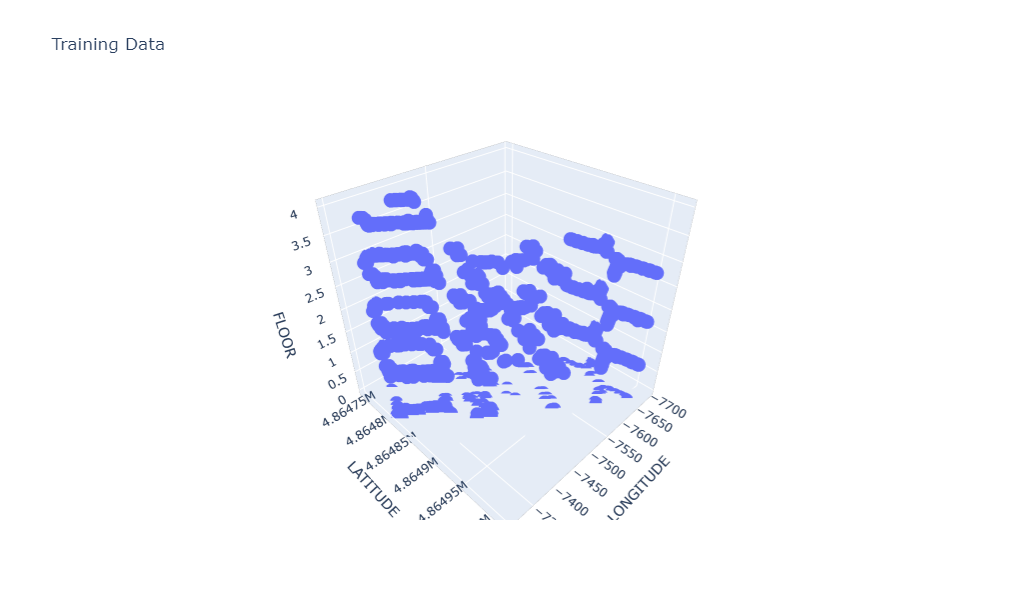

In [77]:
# map the data ie. see the campus
# trainingData
#trainingData.plot(kind = "scatter", x = "LONGITUDE", y = "LATITUDE", alpha = 0.2)

#### Ignacio: Elias, your approach has the problem that doesn't allow to see data in 3D and therefore
#### you see the overlap of the tree floors. A new approach is needed.
fig = px.scatter_3d(trainingData, x='LONGITUDE', y='LATITUDE', z='FLOOR',title="Training Data")
fig.show()
#plt.savefig("data_map.png")

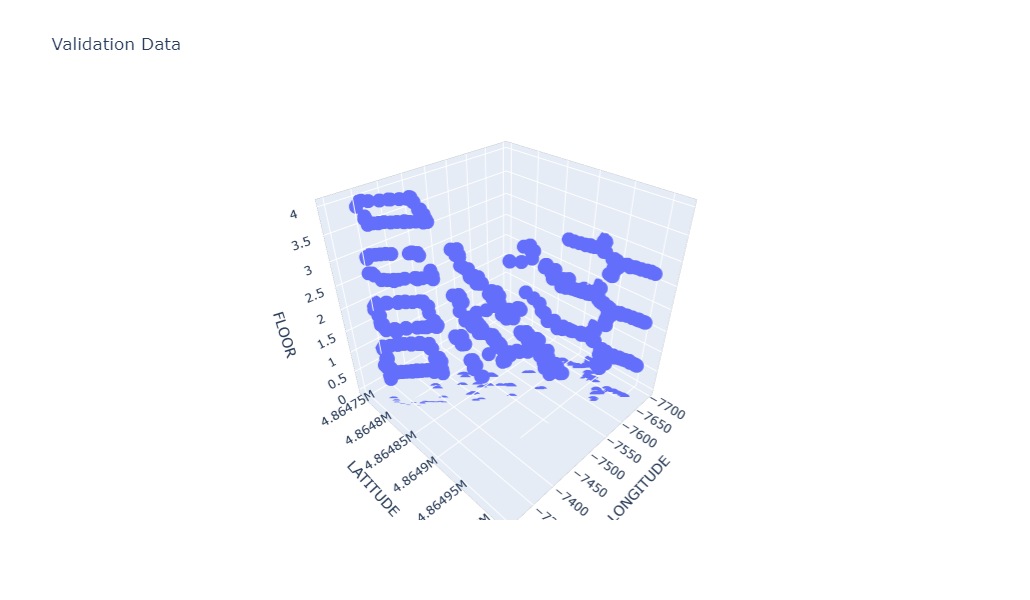

In [78]:
# validationData
fig = px.scatter_3d(validationData, x='LONGITUDE', y='LATITUDE', z='FLOOR',title="Validation Data")
fig.show()

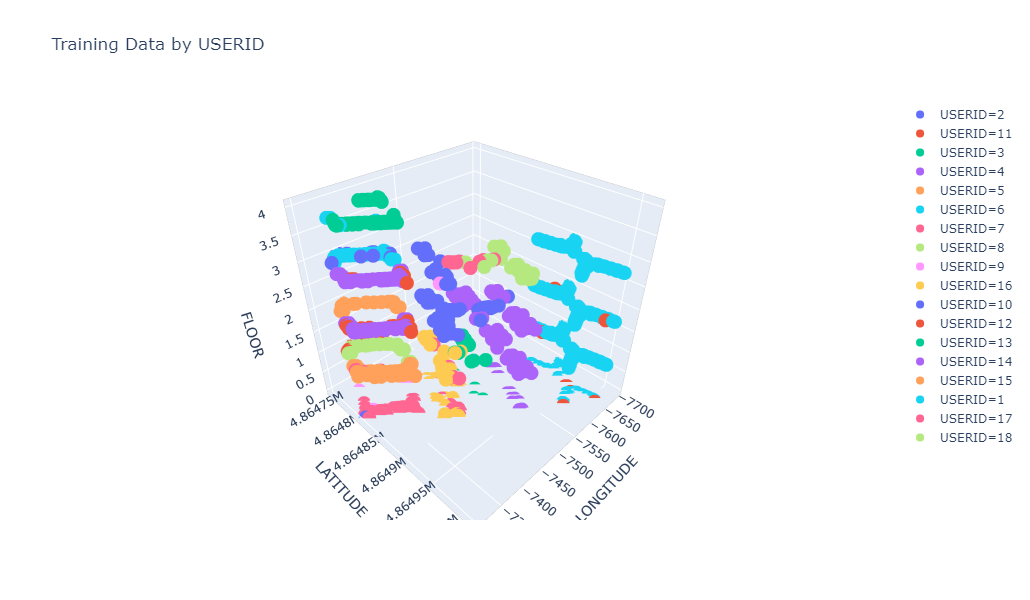

In [79]:
# map the data by user ID
# to see how much of the data in each building was collected by how many users
# trainingData

fig = px.scatter_3d(trainingData, x='LONGITUDE', y='LATITUDE', z='FLOOR',color='USERID',title="Training Data by USERID")
fig.show()

#trainingData.plot(kind = "scatter", x = "LONGITUDE", y = "LATITUDE", alpha = 0.4,
#                  figsize = (10,7), c = "USERID", cmap = plt.get_cmap("jet"),
#                  colorbar = True, sharex = False)
#plt.savefig("users_plot.png")
# we can see that not all users walked around in all buildings. Consider discarding the user id
# due to the intuitively obvious bias
#validationData doesn't have user IDs (all are 0)

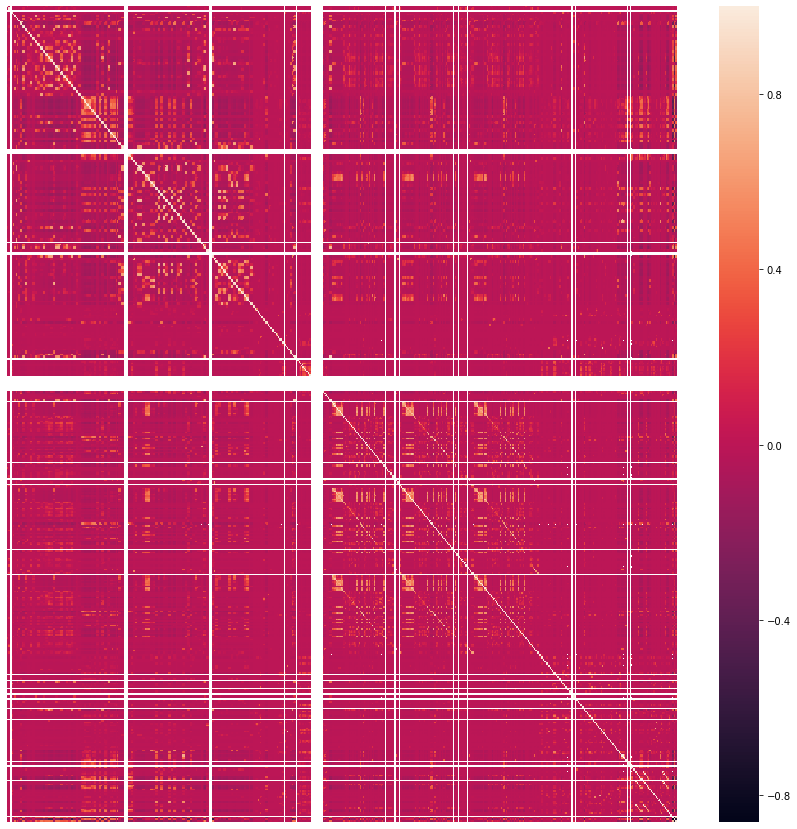

In [80]:
### plot correlations between the WAP features in the training set
#### Ignacio: Why do you set off the ticklabels? This information is extremelly relevant althoguh the analysys not os much.

corr_matrix = trainingData.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, xticklabels = False, yticklabels = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017287D9A7B8>,
      dtype=object)

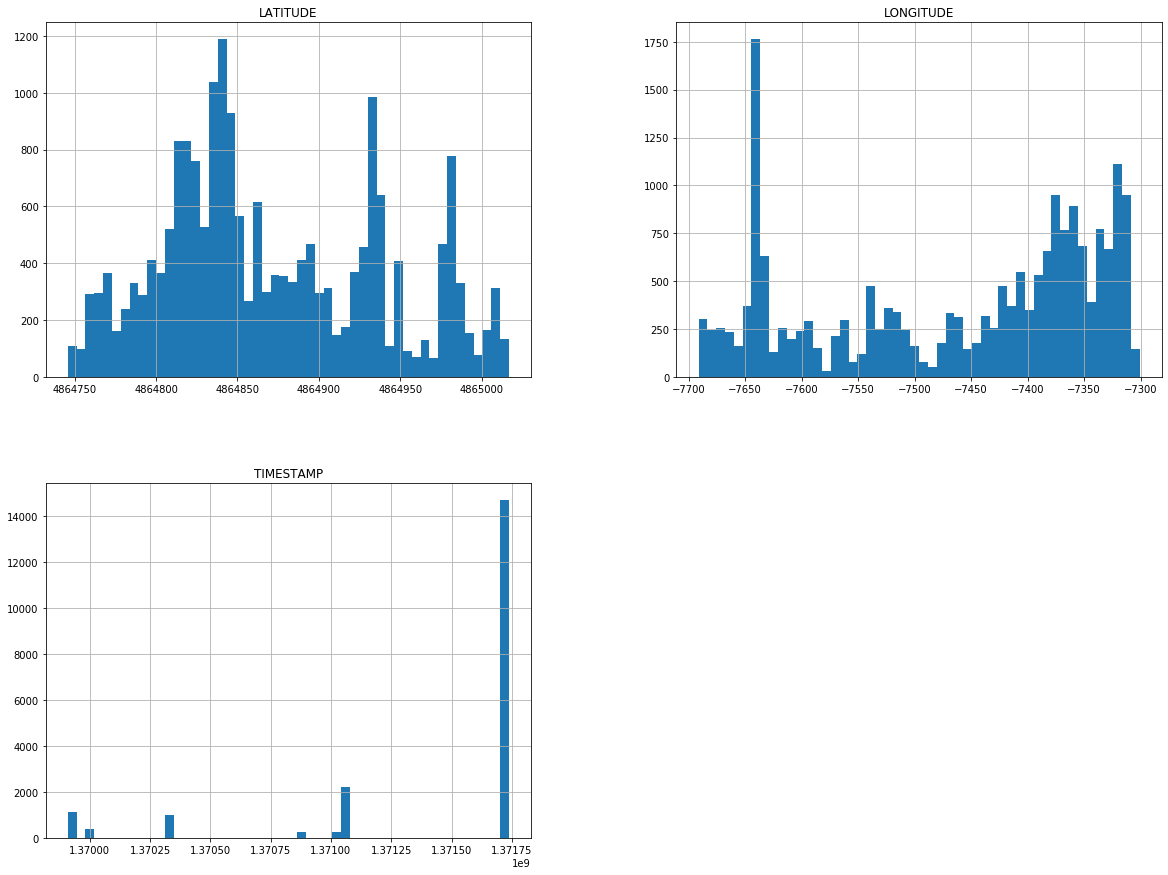

In [81]:
### plot histograms of the attributes
# trainingData
trainingData.iloc[:, 520:529].hist(bins=50, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172880648D0>,
      dtype=object)

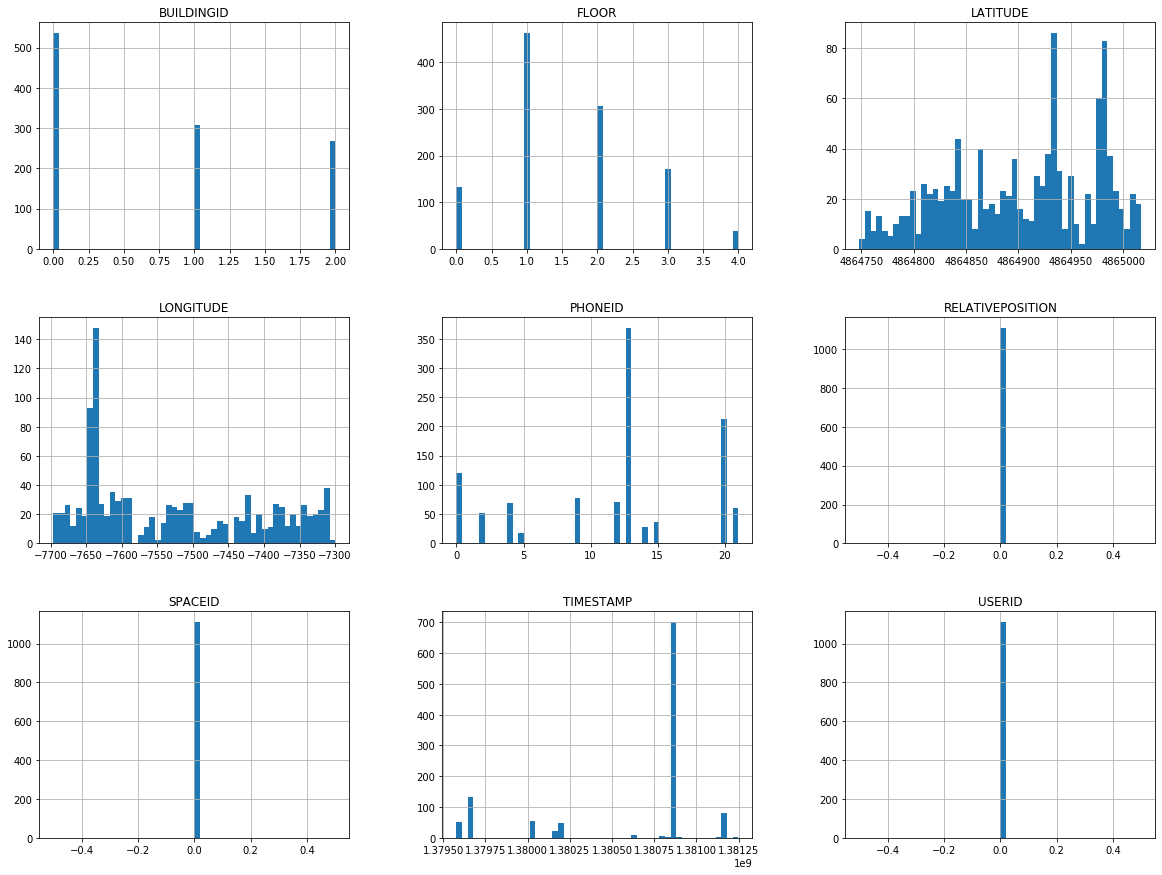

In [82]:
# most attributes seem to have a multinomial distribution.
# Long and Lat which seem to have a skewed bell shaped distribution.
# given this complexity -> classify Building and floor IDs
validationData.iloc[:, 520:529].hist(bins=50, figsize=(20,15))
#plt.savefig("VAL:attribute_histogram_plots")
# distributions of floor and building are quite different in the validation where the subjects have been allowed to move freely

In [ ]:
#### Ignacio: The idea of getting this info is extremelly relevant, but it can be improved just making a comparison plot of both datasets.
#### To this end, you can create a new dataframe with an additional columnn to specify if the observation belongs to the training set 
#### or the testing set.
trainingData['Set'] = 'Training'
validationData['Set'] = 'Validation'